### 引入原始数据

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
 train_images.shape

(60000, 28, 28)

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

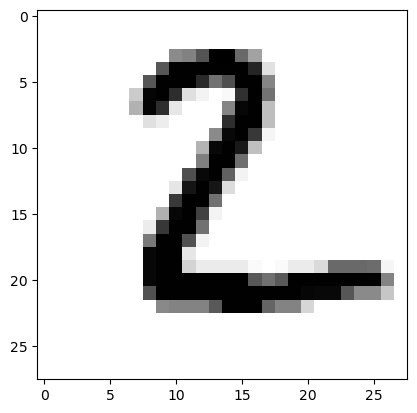

In [6]:
import matplotlib.pyplot as plt

digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 构建神经网络

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 *28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 数据预处理

In [22]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
train_images.shape

(60000, 784)

In [24]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 训练网络

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2561 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1009 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0667 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9888


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0682 - accuracy: 0.9797


In [27]:
print('test_acc:', test_acc)

test_acc: 0.9797000288963318


### 使用model识别图片

In [29]:
test_digit = test_images[0:4]

prediction = model.predict(test_digit)

print(prediction)

1/1 [==============================] - 0s 19ms/step
[[1.3616511e-09 1.1739207e-11 7.3204063e-07 2.6862670e-06 3.1874427e-13
  1.1293976e-09 4.4532296e-15 9.9999642e-01 1.6405080e-09 9.6670057e-08]
 [7.4789300e-11 9.1171967e-07 9.9999905e-01 4.9792535e-09 9.6657554e-20
  4.4753086e-09 3.5610750e-11 2.0696522e-17 2.3852190e-10 1.7142375e-18]
 [4.7752966e-08 9.9980825e-01 2.5112684e-05 1.7329188e-06 8.6250138e-06
  5.8558176e-06 1.0032463e-06 8.6506945e-05 6.2708445e-05 2.5585720e-07]
 [9.9996686e-01 1.8469368e-11 1.3911982e-05 8.6221135e-08 5.2757915e-08
  3.1249226e-07 1.5361873e-05 1.9748536e-06 3.2159755e-10 1.4657822e-06]]
